# EIR 해찾기
 - 주어진 임의의 현가계수, 기간, 현금흐름에 대한 최적 EIR 계산하기
 - 해당 보험금의 금융손익을 계산하기 위함  - 분기 금융손익 = Δ부채 = 현가금액 * (1+계산된 EIR) ^ (3/12)

## 파일 로드 및 해찾기 준비

In [ ]:
import pandas
import scipy.optimize
import numpy as np

In [ ]:
df = pandas.read_excel('/content/drive/MyDrive/EIR찾기.xlsx', header=1)

In [ ]:
df

,경과회차,할인율,Unnamed: 2,경과회차.1,in,out,Unnamed: 6,명목금액,현가금액(curve),현가금액(EIR),Unnamed: 10,Unnamed: 11
0,1.0,0.009232,NaN,1.0,100000.0,80000.0,NaN,-20000.0,-19984.68950,-19934.73885,NaN,NaN
1,2.0,0.009521,NaN,2.0,100000.0,80000.0,NaN,-20000.0,-19968.43917,-19869.69066,NaN,NaN
2,3.0,0.009957,NaN,3.0,100000.0,80000.0,NaN,-20000.0,-19950.52270,-19804.85471,NaN,NaN
3,4.0,0.010503,NaN,4.0,100000.0,80000.0,NaN,-20000.0,-19930.46678,-19740.23034,NaN,NaN
4,5.0,0.011033,NaN,5.0,100000.0,80000.0,NaN,-20000.0,-19908.76732,-19675.81683,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1197.0,0.042777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1197,1198.0,0.042783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,1199.0,0.042788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,1200.0,0.042794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['경과회차', '할인율', 'Unnamed: 2', '경과회차.1', 'in', 'out', 'Unnamed: 6',
       '명목금액', '현가금액(curve)', '현가금액(EIR)', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [ ]:
df = df[['경과회차', '할인율', '경과회차.1', 'in', 'out', '명목금액', '현가금액(curve)', '현가금액(EIR)']]

In [ ]:
df

,경과회차,할인율,경과회차.1,in,out,명목금액,현가금액(curve),현가금액(EIR)
0,1.0,0.009232,1.0,100000.0,80000.0,-20000.0,-19984.68950,-19934.73885
1,2.0,0.009521,2.0,100000.0,80000.0,-20000.0,-19968.43917,-19869.69066
2,3.0,0.009957,3.0,100000.0,80000.0,-20000.0,-19950.52270,-19804.85471
3,4.0,0.010503,4.0,100000.0,80000.0,-20000.0,-19930.46678,-19740.23034
4,5.0,0.011033,5.0,100000.0,80000.0,-20000.0,-19908.76732,-19675.81683
...,...,...,...,...,...,...,...,...
1196,1197.0,0.042777,NaN,NaN,NaN,NaN,NaN,NaN
1197,1198.0,0.042783,NaN,NaN,NaN,NaN,NaN,NaN
1198,1199.0,0.042788,NaN,NaN,NaN,NaN,NaN,NaN
1199,1200.0,0.042794,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
targetDebt = df['현가금액(curve)'].sum()

In [ ]:
targetDebt

-3706654.083779

## 해찾기 scipy.optimize.fsolve, scipy.optimize.newton
 - 잘 안됨, 공식문서에서 옛날 함수라고 비추함

In [ ]:
func = lambda eir: (df['명목금액'].fillna(0) / (1 + eir) ** (df['경과회차'] / 12)).sum() - targetDebt

In [ ]:
x1 = scipy.optimize.fsolve(func, x0=0, full_output=True)

In [ ]:
x1

(array([0.04480662]),
 {'nfev': 43,
  'fjac': array([[-1.]]),
  'r': array([-41860.94130419]),
  'qtf': array([-645326.47442761]),
  'fvec': 645326.2646532347},
 5,
 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.')

In [ ]:
x2 = scipy.optimize.newton(func, tol=0.00001, x0=0, maxiter=10000, full_output=True, disp=True)

In [ ]:
x2

(0.28865025650309134,       converged: True
            flag: 'converged'
  function_calls: 17
      iterations: 16
            root: 0.28865025650309134)

## 해찾기 scipy.optimize.minimize
 - 잘 됨, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
 - `method='Newton-CG'` 를 넣으면 잘 안됨

> If not given, chosen to be one of BFGS, L-BFGS-B, SLSQP, depending on whether or not the problem has constraints or bounds.

In [ ]:
x3 = scipy.optimize.minimize(
    func
    , x0=0
    # , method='Newton-CG'
    , options={'maxiter': 10000, 'disp': True, 'return_all': True})

         Current function value: 645326.231506
         Iterations: 4
         Function evaluations: 38
         Gradient evaluations: 19


In [ ]:
x3

  allvecs: [array([0.]), array([1.01]), array([0.04473376]), array([0.04479964]), array([0.04479964])]
      fun: 645326.2315060906
 hess_inv: array([[7.35164208e-10]])
      jac: array([9.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 38
      nit: 4
     njev: 19
   status: 2
  success: False
        x: array([0.04479964])

In [ ]:
type(x3)

scipy.optimize.optimize.OptimizeResult

In [ ]:
resultEir = x3.x[0]

## 임의의 정의역 `[0, 0.5)` (0~50%)에 대한 그래프 그려서 최소값 확인하기

In [ ]:
df_check = pandas.DataFrame()

In [ ]:
df_check['eirRange'] = np.arange(0, 0.5, 0.0001)

In [ ]:
df_check['func(eir)'] = df_check['eirRange'].apply(lambda x: func(x) + targetDebt)
df_check['targetDebt'] = targetDebt
df_check = df_check.set_index('eirRange')

In [ ]:
df_check

,func(eir),targetDebt
eirRange,,
0.0000,920000.000000,-3.706654e+06
0.0001,891654.954259,-3.706654e+06
0.0002,863477.559920,-3.706654e+06
0.0003,835466.934730,-3.706654e+06
0.0004,807622.200981,-3.706654e+06
...,...,...
0.4995,-582455.909225,-3.706654e+06
0.4996,-582358.423391,-3.706654e+06
0.4997,-582260.976137,-3.706654e+06


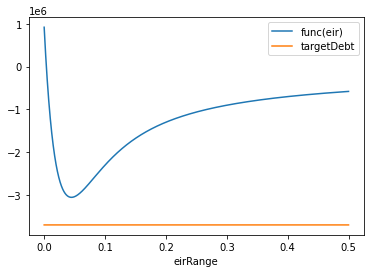

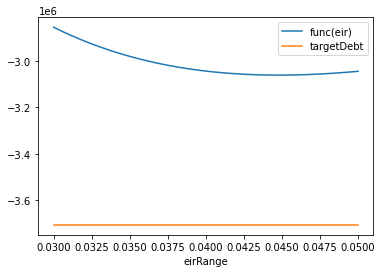

In [ ]:
df_check.plot.line()
df_check[0.03:0.05].plot.line()

In [ ]:
print(f'명목부채(curve):\t\t{targetDebt}\n명목부채(Minimized):\t{func(resultEir) + targetDebt}\nEIR:\t\t\t{resultEir}')

명목부채(curve):		-3706654.083779
명목부채(EIR, Optimize):	-3061327.8522729096
EIR:			0.044799636723775536
